___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Exercise

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, RNN, SimpleRNN, LSTM, GRU, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Project Tasks

**TASK: Read in the data set "Frozen_Dessert_Production.csv" from the Data folder. Figure out how to set the date to a datetime index columns**

In [2]:
# CODE HERE

In [4]:
ls ../DATA/

advanced_housing.csv            Frozen_Dessert_Production.csv
african_econ_crises.csv         german_credit_data.csv
bank-additional-full.csv        heart.csv
bank-additional-names.txt       iris.csv
bank.csv                        kc_house_data.csv
boxplot.png                     LCDataDictionary.xlsx
california_housing_sklearn.csv  lending_club_info.csv
cancer_classification.csv       lending_club_loan_two.csv
diamonds.csv                    melb_data.csv
ECOMPCTNSA.csv                  RSCCASN.csv
energydata_complete.csv         stroke_data.csv
example.csv                     stroke_features.png
Excel_Sample.xlsx               UK_foods.csv
fake_reg.csv                    Universities.csv
flights.csv


In [7]:
data_filepath = "../DATA/Frozen_Dessert_Production.csv"

df = pd.read_csv(data_filepath, parse_dates=["DATE"], index_col=["DATE"])

In [10]:
df

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


**Task: Change the column name to Production**

In [5]:
#CODE HERE

In [11]:
df.columns = ["Production"]
df

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


**TASK: Plot out the time series**

In [8]:
#CODE HERE

<AxesSubplot: xlabel='DATE'>

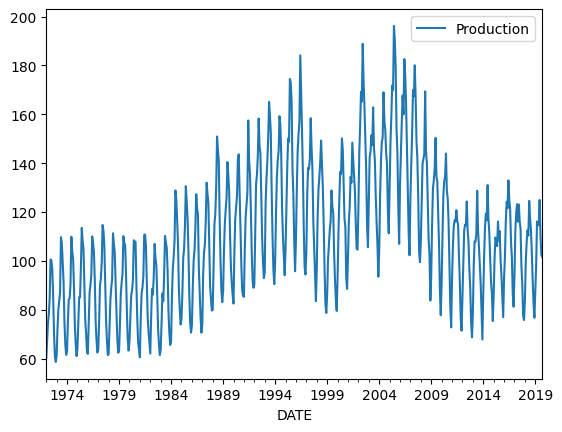

In [19]:
df.plot()

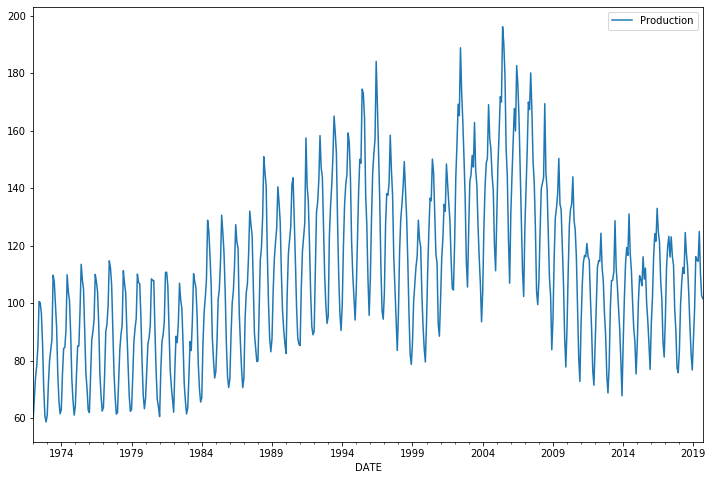

## Train Test Split

**TASK: Figure out the length of the data set**

In [10]:
#CODE HERE

In [21]:
data_length = df.shape[0]
data_length

573

573

**TASK: Split the data into a train/test split where the test set is the last 24 months of data.**

In [12]:
#CODE HERE

In [25]:
test_size = 24
split_idx = data_length - test_size
train_df = df.iloc[:split_idx, :]
test_df = df.iloc[split_idx:, :]

In [26]:
train_df

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2017-05-01,116.0635
2017-06-01,123.0870
2017-07-01,116.2639


In [27]:
test_df

,Production
DATE,
2017-10-01,90.4732
2017-11-01,77.4378
2017-12-01,75.8118
2018-01-01,83.4343
2018-02-01,99.4899
2018-03-01,107.3152
2018-04-01,112.4309
2018-05-01,110.3544
2018-06-01,124.5841


In [28]:
test_df.shape[0]

24

24

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [16]:
# CODE HERE

In [34]:
scaler = MinMaxScaler()
scaler.fit(train_df)
train_df_scaled = scaler.transform(train_df)
test_df_scaled = scaler.transform(test_df)

MinMaxScaler(copy=True, feature_range=(0, 1))

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The batch length is up to you, but at a minimum it should be at least 18 to capture a full year seasonality.**

In [21]:
#CODE HERE

In [41]:
batch_length = 18
n_features = df.shape[1]
batch_size = 1
train_gen = TimeseriesGenerator(train_df_scaled, train_df_scaled, length=batch_length, batch_size=batch_size)

In [45]:
len(train_gen)

531

In [46]:
len(train_df_scaled)

549

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTM units you want and a final Dense Layer.**

In [86]:
DROPOUT = 0.1

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(batch_length, n_features), dropout=DROPOUT))
model.add(Dense(36, activation='relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [87]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 100)               40800     
                                                                 
 dense_16 (Dense)            (None, 36)                3636      
                                                                 
 dropout_2 (Dropout)         (None, 36)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 37        
                                                                 
Total params: 44,473
Trainable params: 44,473
Non-trainable params: 0
_________________________________________________________________


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


**TASK: Create a generator for the scaled test/validation set. NOTE: Double check that your batch length makes sense for the size of the test set as mentioned in the RNN Time Series video.**

In [27]:
# CODE HERE

In [88]:
test_gen = TimeseriesGenerator(test_df_scaled, test_df_scaled, batch_length, batch_size=batch_size)

**TASK: Create an EarlyStopping callback based on val_loss.**

In [29]:
#CODE HERE

In [102]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

**TASK: Fit the model to the generator, let the EarlyStopping dictate the amount of epochs, so feel free to set the parameter high.**

In [32]:
# CODE HERE

In [103]:
model.fit(train_gen,
          epochs=20,
          validation_data=test_gen,
          callbacks=[early_stop])

Epoch 1/20
 29/531 [>.............................] - ETA: 2s - loss: 0.0025   

2023-03-01 21:05:09.321288: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


531/531 [==============================] - 3s 5ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 2/20
 19/531 [>.............................] - ETA: 2s - loss: 0.0036

2023-03-01 21:05:12.120593: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


531/531 [==============================] - 3s 5ms/step - loss: 0.0031 - val_loss: 0.0035
Epoch 3/20
531/531 [==============================] - 3s 5ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 4/20
531/531 [==============================] - 3s 5ms/step - loss: 0.0034 - val_loss: 0.0024
Epoch 5/20
531/531 [==============================] - 3s 5ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 6/20
531/531 [==============================] - 3s 5ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 7/20
531/531 [==============================] - 2s 5ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 8/20
531/531 [==============================] - 3s 5ms/step - loss: 0.0037 - val_loss: 0.0023
Epoch 9/20
531/531 [==============================] - 3s 5ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 10/20
531/531 [==============================] - 3s 5ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 11/20
531/531 [==============================] - 3s 5ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 12/

Epoch 1/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0261 - val_loss: 0.0043
Epoch 2/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0076 - val_loss: 0.0029
Epoch 3/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0039 - val_loss: 0.0074
Epoch 4/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 5/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0029 - val_loss: 0.0038
Epoch 6/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0036 - val_loss: 0.0023
Epoch 7/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 8/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0030 - val_loss: 0.0025


**TASK: Plot the history of the loss that occured during training.**

In [34]:
# CODE HERE

In [104]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot: >

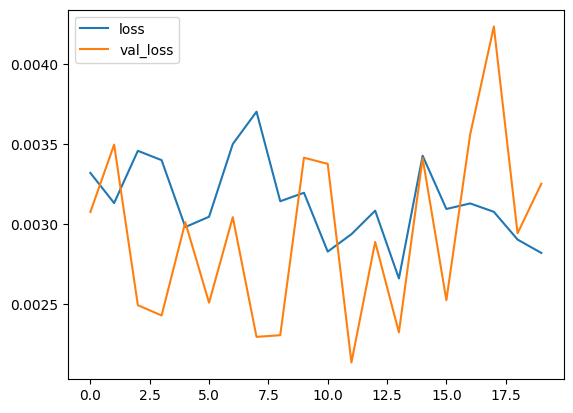

In [105]:
loss_df.plot()

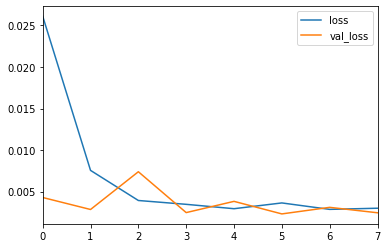

## Evaluate on Test Data

**TASK: Forecast predictions for your test data range (the last 12 months of the entire dataset). Remember to inverse your scaling transformations. Your final result should be a DataFrame with two columns, the true test values and the predictions.**

In [36]:
# CODE HERE

In [129]:
test_predictions = []

final_batch = train_df_scaled[-batch_length:, :]
current_batch = final_batch.reshape((1, batch_length, n_features))

for test_val in test_df_scaled:
    pred_val = model.predict(current_batch)
    test_predictions.append(pred_val[0])
    current_batch = np.append(current_batch[:,1:,:], pred_val.reshape(1,1,1), axis=1)

1/1 [==============================] - 0s 17ms/step


In [142]:
test_predictions_scaled = scaler.inverse_transform(test_predictions)
pred_df = pd.DataFrame(test_predictions_scaled, index=test_df.index, columns=['Predictions'])

In [143]:
test_pred_df = pd.concat([test_df, pred_df], axis=1)
test_pred_df

,Production,Predictions
DATE,,
2017-10-01,90.4732,84.208604
2017-11-01,77.4378,78.163677
2017-12-01,75.8118,79.384868
2018-01-01,83.4343,89.428678
2018-02-01,99.4899,99.532442
2018-03-01,107.3152,106.217879
2018-04-01,112.4309,109.733032
2018-05-01,110.3544,111.387780
2018-06-01,124.5841,109.191774


C:\Users\Marcial\Anaconda3\envs\tf2gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Production,Predictions
DATE,,
2017-10-01,90.4732,84.348756
2017-11-01,77.4378,75.246538
2017-12-01,75.8118,75.356393
2018-01-01,83.4343,84.964974
2018-02-01,99.4899,95.405271
2018-03-01,107.3152,103.265306
2018-04-01,112.4309,109.163361
2018-05-01,110.3544,113.237268
2018-06-01,124.5841,114.119150


**TASK: Plot your predictions versus the True test values. (Your plot may look different than ours).**

In [41]:
# CODE HERE

<AxesSubplot: xlabel='DATE'>

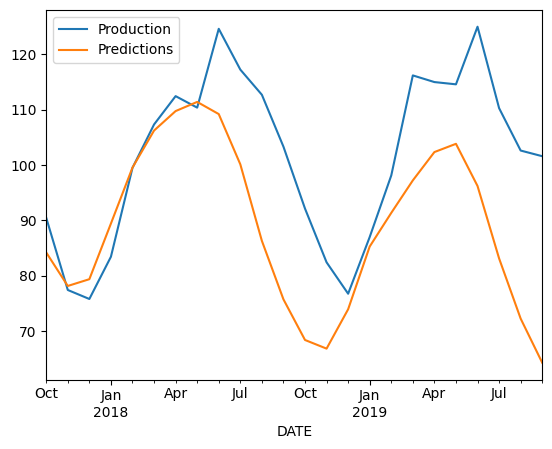

In [144]:
test_pred_df.plot()

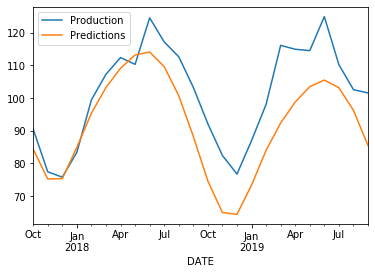

**TASK: Calculate your RMSE.**

In [1]:
#CODE HERE

In [151]:
mean_squared_error(test_pred_df['Production'].values, test_pred_df['Predictions'].values, squared=False)

17.620318501076767